# Анализ убытков приложения ProcrastinatePRO+

Необходимо проанализировать данные развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Задача — разобраться в причинах и помочь компании выйти в плюс, разработать основные рекомендации для отдела маркетинга. 

Рассматриваемый период - с 1 мая по 27 октября 2019 года.
Даны данные о визитах, заказах и рекламных расходах.


### Загрузка данных и предобработка

In [2]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [4]:
#Изучим данные из датасета о посещениях
print(visits.head())
visits.info()

        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  

In [5]:
#Заменим названия столбцов на корректные
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

#Изменим тип данных в колонках с датой
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
#Проверим датасет на явные дубликаты
visits.duplicated().sum()

0

In [7]:
#Проверим датасет на неявные дубликаты
print(visits['region'].unique())
print(visits['device'].unique())
visits['channel'].unique()

['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']


array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [8]:
#Изучим данные из датасета о заказах
print(orders.head())
orders.info()

        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
#Заменим названия столбцов на корректные
orders.columns = ['user_id', 'event_dt', 'revenue']

#Изменим тип данных в колонке с датой
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [10]:
#Проверим датасет на явные дубликаты
orders.duplicated().sum()

0

In [11]:
#Изучим данные из датасета о посещениях
print(costs.head())
costs.info()

           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [12]:
#Заменим названия столбцов на корректные
costs.columns = ['dt', 'channel', 'costs']

#Изменим тип данных в колонке с датой
costs['dt'] = pd.to_datetime(costs['dt'])

In [13]:
#Проверим датасет на явные дубликаты
costs.duplicated().sum()

0

In [14]:
#Проверим датасет на неявные дубликаты
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Предобработка данных проведена. Дубликатов не обнаружено. Столбцы приведены в корректную запись, данные, содержащие дату приведены в соотвтетствующий тип.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.


- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.


- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [49]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [50]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [51]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [52]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [53]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [54]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [55]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [56]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Все необходимые функции для дальнейшего анализа были вызваны. Перейдем к исследованию.

### Исследовательский анализ данных


***Профили пользователей***

In [57]:
#Получим профили пользователей
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769  


In [58]:
#Найдем первую и последнюю дату, в которые привлекались пользователи
min_date = profiles['dt'].min()
max_date = profiles['dt'].max() 
print("Первая дата привлечения:", min_date)
print('Последняя дата привлечения', max_date)

Первая дата привлечения: 2019-05-01 00:00:00
Последняя дата привлечения 2019-10-27 00:00:00


Вывод: составлены профили пользователей, которые привлекались с 1 мая 2019 года и до 27 октября 2019 года включительно.

***Страны привлечения пользователей***

In [59]:
#Построим таблицу с количеством пользователей по странам
user_region= pd.DataFrame()
#Добавим столбец с количеством пользователей 
user_region['users_count'] = profiles.groupby('region')['user_id'].count()
#Добавим столбец с количеством платящих пользователей
user_region['payer_users_count'] = profiles.query('payer == True').groupby('region')['user_id'].count()
#Добавим столбец с долей платящих пользователей
user_region['per_share'] = (user_region['payer_users_count'] / user_region['users_count'])*100
#Отсортируем таблицу по доле платящих пользователей
user_region.sort_values(by='per_share', ascending=False)

,users_count,payer_users_count,per_share
region,,,
United States,100002,6902,6.901862
Germany,14981,616,4.111875
UK,17575,700,3.982930
France,17450,663,3.799427


Вывод: Больше всего платящих пользователей в Америке, почти 7% от всех пользователей. Наименьшая доля платящих клиентов во Франции.

***Устройства клиентов***

In [60]:
#Построим таблицу с устройствами пользователей
user_device = pd.DataFrame()
#Добавим столбец с количеством пользователей по устройствам
user_device['users_count'] = profiles.groupby('device')['user_id'].count()
#Добавим столбец с количеством платящих пользователей по устройствам
user_device['payer_users_count'] = profiles.query('payer == True').groupby('device')['user_id'].count()
#Добавим столбец с долей платящих пользователей
user_device['per_share'] = (user_device['payer_users_count'] / user_device['users_count'])*100
#Отсортируем таблицу по доле платящих пользователей
user_device.sort_values(by='per_share', ascending=False)

,users_count,payer_users_count,per_share
device,,,
Mac,30042,1912,6.364423
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790


Вывод: больше всего пользователи используют iphone, меньше всего Mac. Однако именно пользователи через Mac чаще всего совершают покупки, но и пользователи с iphone не сильно отстают.

***Источники и каналы привлечения пользователей***

In [61]:
#Построим таблицу с источниками привлечения
user_channel = pd.DataFrame()
#Добавим столбец с количеством пользователей по каналам привлечения
user_channel['users_count'] = profiles.groupby('channel')['user_id'].count()
#Добавим столбец с количеством платящих пользователей                                             
user_channel['payer_users_count'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
#Добавим столбец с долей платящих пользователей
user_channel['per_share'] = (user_channel['payer_users_count'] / user_channel['users_count'])*100
#Отсортируем таблицу по доле платящих пользователей
user_channel.sort_values(by='per_share', ascending=False)                                            

,users_count,payer_users_count,per_share
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


Вывод: несмотря на то, что большая часть пользователей приходит сама, эта доля пользователей меньше всего совершает покупки. Наибольшую вероятность платежа приходят такие каналы привлечени как FaceBoom, AdNonSense, lambdaMediaAds	

### Маркетинг


In [62]:
#Общая сумма расходов на маркетинг
print('Все расходы на маркетинг:',costs['costs'].sum())

Все расходы на маркетинг: 105497.30000000002


In [63]:
#Рассмотрим, как траты распределены по рекламным источникам
costs_channel = pd.DataFrame()
costs_channel['sum'] = costs.groupby('channel')['costs'].sum()
costs_channel['per_share'] = costs_channel['sum'] / (costs['costs'].sum())*100
costs_channel.sort_values(by='sum', ascending=False)

,sum,per_share
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


Больше всего трат уходит на каналы TipTop и FaceBoom, они занимают 51% и 30% соответственно от общих расходов

***Динамика изменения расходов во времени***


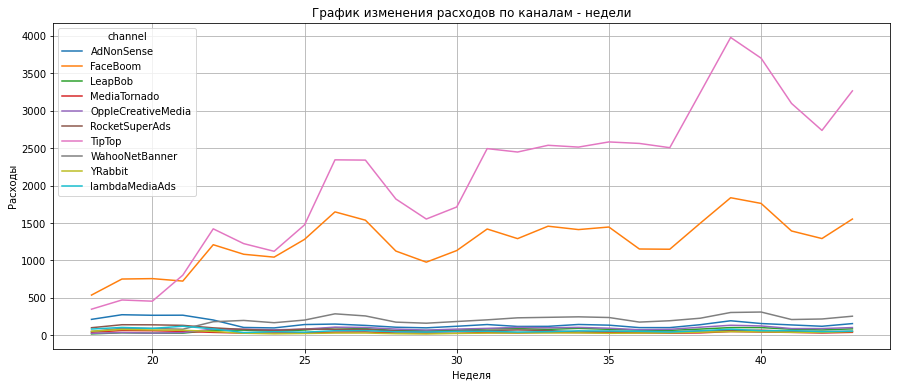

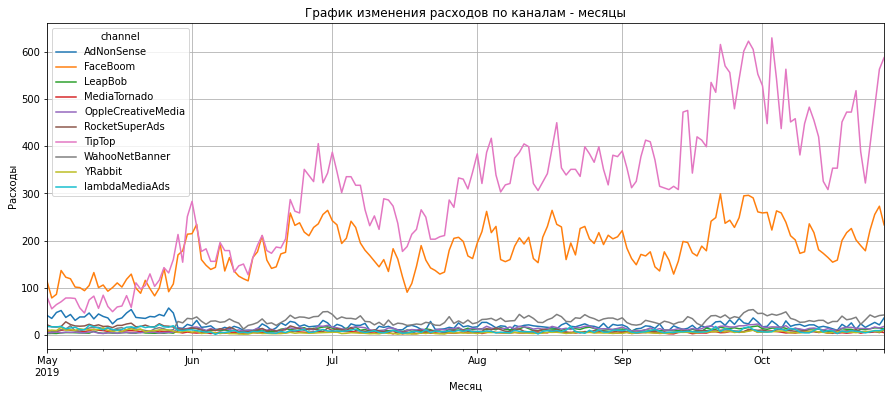

In [64]:
#Построим динамику по неделям
dynamics_week = costs.pivot_table(index=pd.to_datetime(costs['dt']).dt.isocalendar().week,
                                  columns = 'channel',
                                  values='costs',
                                  aggfunc='sum')
        
dynamics_week.plot(grid=True, figsize=(15, 6))

plt.title('График изменения расходов по каналам - недели')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.show()

#Построим динамику по месяцам
dynamics_week = costs.pivot_table(index=costs['dt'],
                                  columns = 'channel',
                                  values='costs',
                                  aggfunc='sum')
        
dynamics_week.plot(grid=True, figsize=(15, 6))

plt.title('График изменения расходов по каналам - месяцы')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

Вывод: по графикам видно, что на большинство каналов расходы были стабильны, но постепенно росли на TipTop и на FaceBoom.

***CAC из каждого источника***

In [65]:
#Рассчитаем CAC для каждого источника привлечения пользователей
profiles.pivot_table(index='channel', 
                     values='acquisition_cost', 
                     aggfunc='mean').sort_values(by = 'acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Вывод: самой дорогой средней стоимостью привлечения пользователей является стоимость через канал TipTop (2,8), а также через канал FaceBoom(1,1) и AdNonSense(1). 

Общий вывод: самым дорогим источником привлечения является TipTop, и с течением времени затраты на рекламу через этот источник только растут. Стоит раасмотреть окупаемость этих затрат и делать дальнейшие выводы по рациональности таких трат. Также возможно стоит распределить более равномерно затраты на другие источники, т.к. всего на 2 источника уходит больше 80% всех затрат. 

### Оценка окупаемости рекламы


In [66]:
#Исключим из анализа органических пользователей, т.к. для анализа необходимы пользователи, привлеченные только благодаря рекламе
profiles =  profiles.query('channel != "organic"')

In [67]:
#Зададим момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

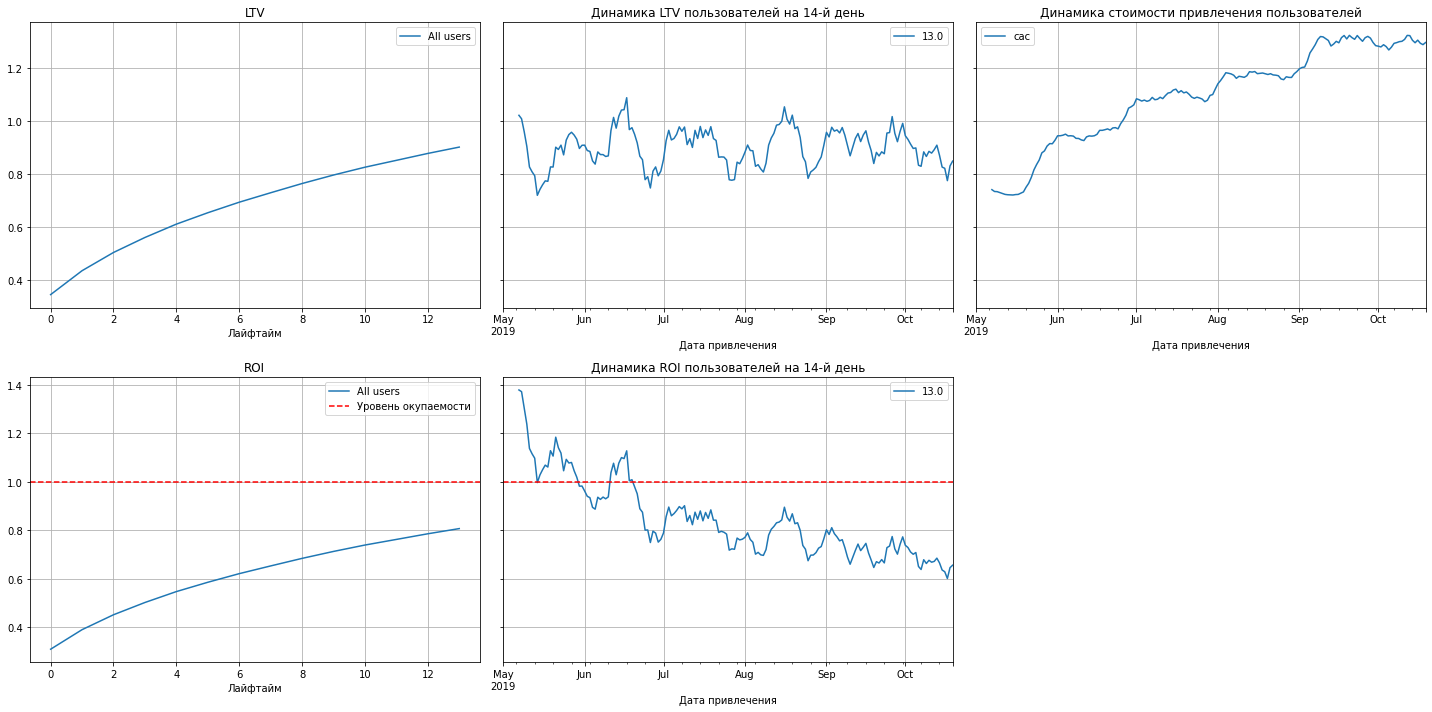

In [68]:
#Считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

#Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Вывод:
1. CAC растет на всем временном отрезке, то есть сумма расходов на привлечение пользователей все время увеличивается, в октябре более стабильные, но высокие траты.
2. LTV в среднем остается в одном и том же диапазоне на всем временно мотрезке.
3. ROI не достигает уровня окупаемости, но стремится к этому.
4. Окупаемость проходит в начале июня.

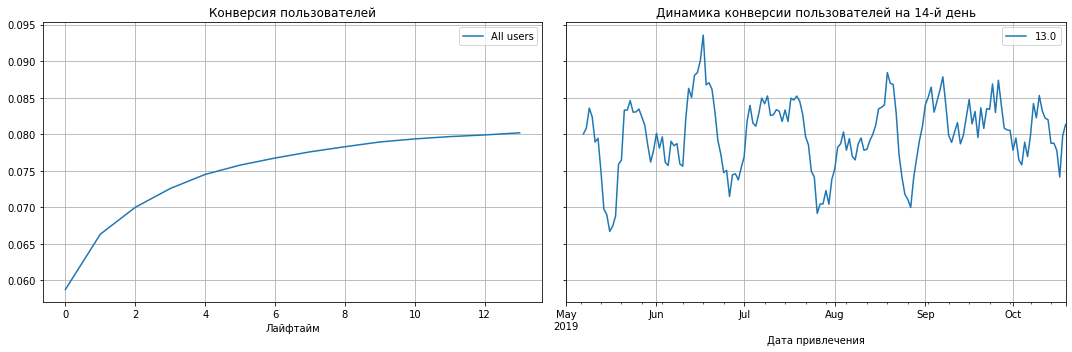

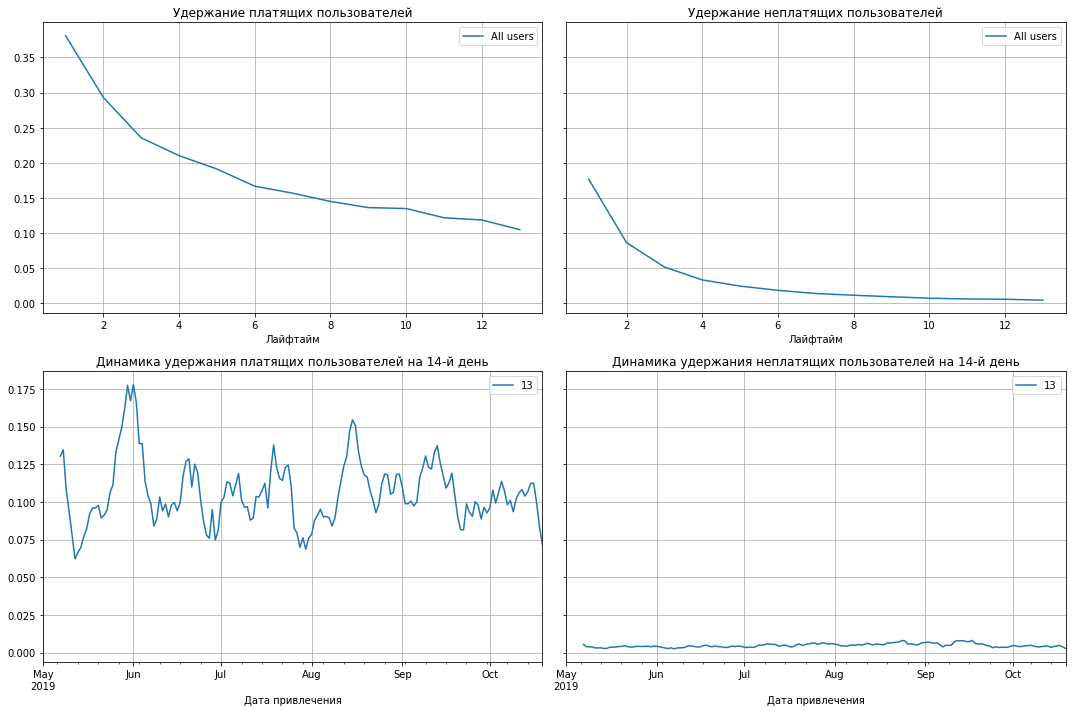

In [69]:
#Проверим конверсию пользователей и динамику изменений
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

#Проверим удержание пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод:в целом конверсия и удержание пользователей выглядит объективно, согласно всем ограничениям. 

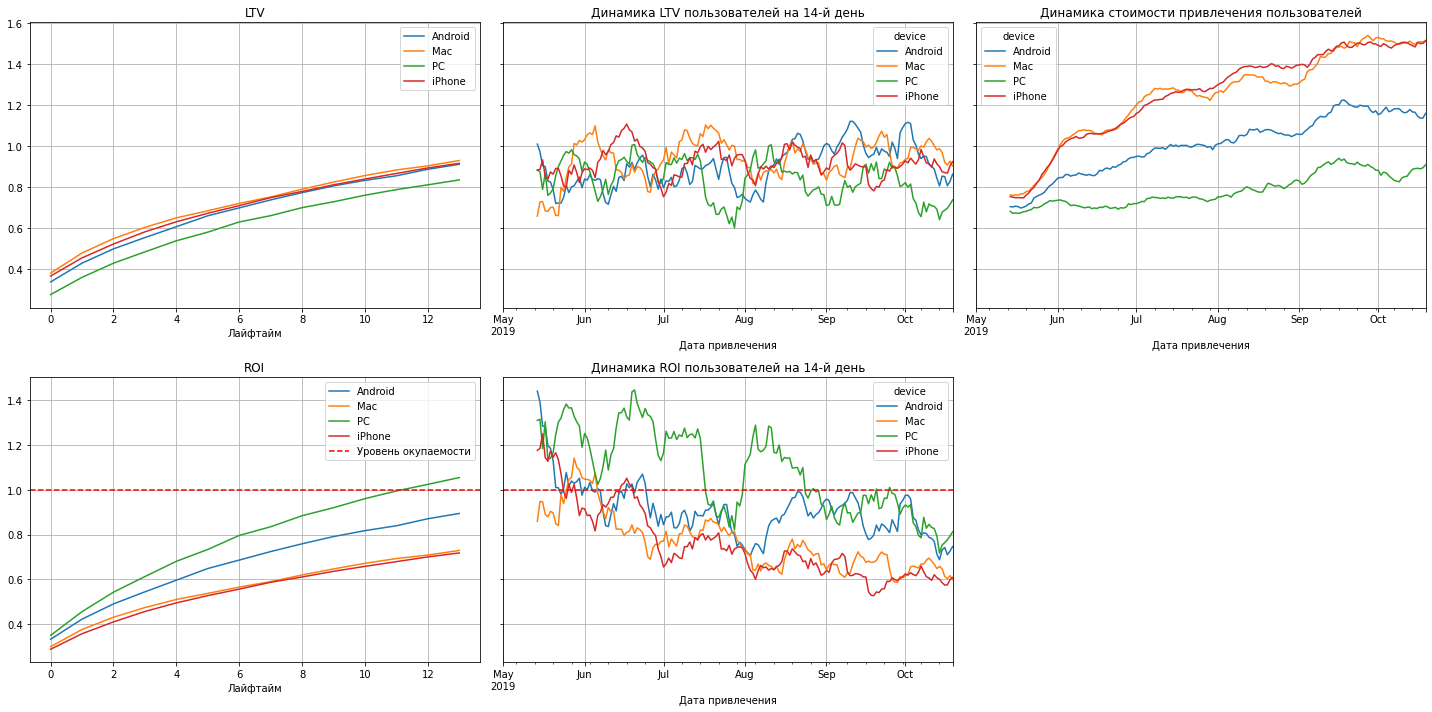

In [70]:
#Проанализируем окупаемость рекламы с разбивкой по устройствам. 
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод:PC частично окупается, но в него и вкладывается меньше средств, а iphone и Mac несмотря на свою большую популярность, не окупаются, при этом стоимость привлечения через них наивысшая и продолжает увеличиваться. Android также не окупается.

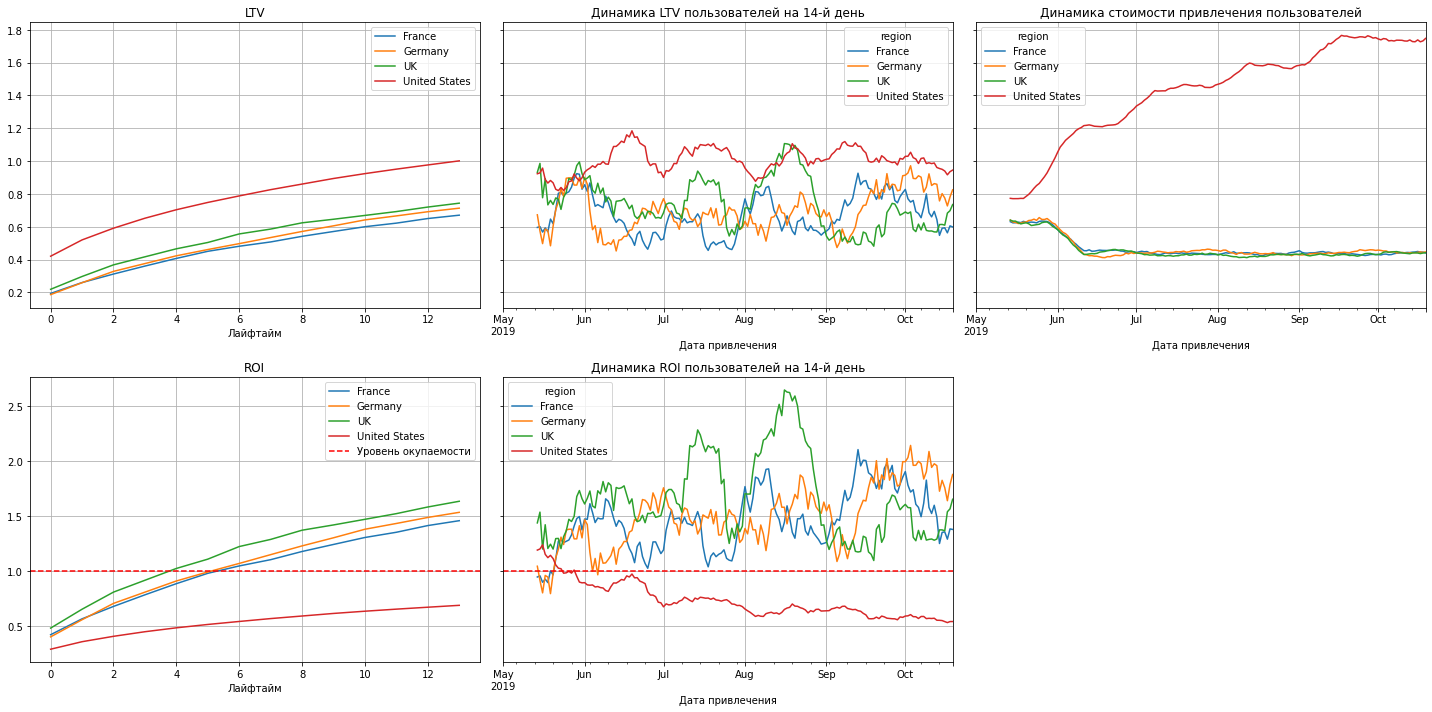

In [71]:
#Проанализируем окупаемость рекламы с разбивкой по странам.
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод: Самая популярная страна пользователей - Америка и именно в нее вкладывается больше всего денежных средств на привлечение. А по итогу такие вложения вообще не окупаются. Зато Великобритания, Германия и Франция, в которые не так много вкладывается денежных средств на привлечение, стабильно окупаются. 

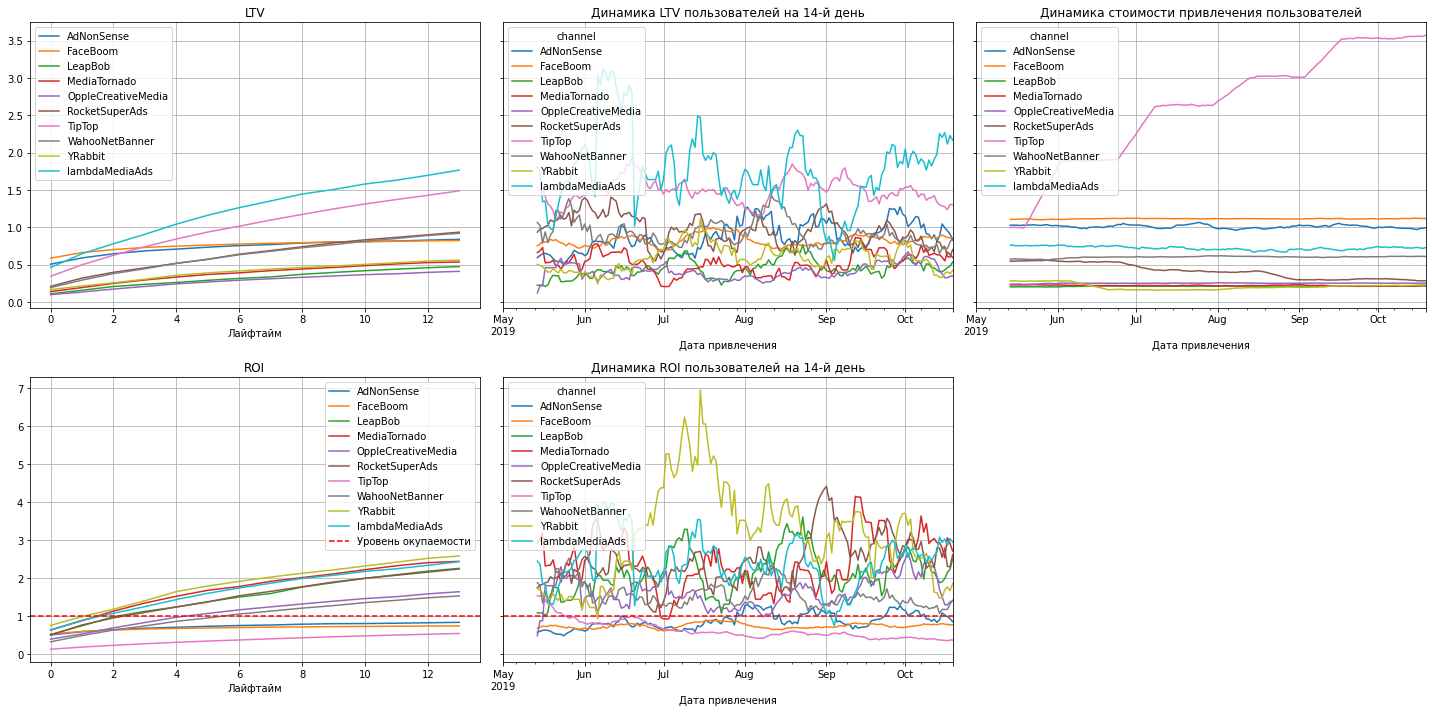

In [72]:
#Проанализируем окупаемость рекламы с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод: Заметны сильно высокие вложения в канал Tip Top, однако такие вложения не окупаются. Лидером по окупаемости можно назвать YRabbit, но в него меньше всего вкладывается средств. Популярным каналом является LambdaMediaAds, который окупается. 

***Выводы:***
1. В целом реклама, направленная на привлечение пользователей, не окупается
2. Негативное влияние на окупаемость оказываеют: страны - USA, рекламные каналы - TipTop, FaceBoom и AdNonSense, устройства - iPhone и MAC. Вложения в рекламу во все перечисленное слишком большие по сравнению с остальными вложениями. И эти вложения не окупаются. 
3.Проблемы окупаемости связаны с нерациональным и необъективным распределением расходов на маркетинг, то есть выбраны не те страны, каналы или устройства, которые не возвращают ожидаемую выгоду от вложений.

***Причины***

Как уже было сказано выше основные проблемы неэффективности привлечения пользователей связаны с необъективным распределением расхожодов на привлечение пользователей. Однако также это может быть связано со следующими причинами:
- Странным кажется неокупаемость вложений в устройства - iPhone и Mac, ведь это самые популярные устройства. Возможно есть сбои в работе приложения на этапе оплаты. 
- Также большие вложения в США не кажутся рациональными. Возможно потенциальные пользователи в этой стране не являются целевой аудиторией приложения по тем или иным причинам.
- Неокупаемость каналов привлечения тоже может быть связана с непопаданием в целевую аудитории приложения, которая отличается от ЦА канала, а также стоимость рекламы на данных каналах может быть завышена. 

***Рекомендации***

В данном случае рекомендациями для отдела маркетинга могут послужить следующие:
- Рассмотреть альтернативные каналы продвижения приложения. Изучить популярность и схожесть целевых аудиторий каналов и приложения. И в целом распределять средства на привлечения более равномерно, используя принцип диффирианции каналов сбыта для избежания риска потери вложений и неокупаемости.
- В частности можно рассмотреть такие каналы продвижения: Yrabbit, MediaTornado. У данных каналов наблюдается наивысшая окупаемость инвестиций. 
- Также равномернее стоит привлекать пользователей и из других стран, не только Америки.
- Высокий процент окупаемости наблюдается у пользователей Android, возможно не стоит не учитывать потенциал данных пользователей.